**DESCRIPTION**

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Import data into Python environment.
data = pd.read_csv("Comcast_telecom_complaints_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [4]:
data.shape

(2224, 11)

In [5]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [6]:
data.isna().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [7]:
#Provide the trend chart for the number of complaints at monthly and daily granularity levels.
data['Customer Complaint'].unique()

array(['Comcast Cable Internet Speeds',
       'Payment disappear - service got disconnected',
       'Speed and Service', ..., 'complaint about comcast',
       'Extremely unsatisfied Comcast customer',
       'Comcast, Ypsilanti MI Internet Speed'], dtype=object)

In [8]:
#Provide a table with the frequency of complaint types.
data['Customer Complaint'].value_counts()

Comcast                                       83
Comcast Internet                              18
Comcast Data Cap                              17
comcast                                       13
Comcast Data Caps                             11
                                              ..
Comcast charging for services not rendered     1
Comcast Overbilling                            1
COMCAST THROTTLING SPEEDS AND DATA CAPS        1
Complaint#67455                                1
Ridiculous Charges                             1
Name: Customer Complaint, Length: 1841, dtype: int64

In [9]:
data['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [10]:
data['Status'].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [11]:
#Create a new categorical variable with value as Open and Closed. 
#Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
data["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in data["Status"]]
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,newStatus
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed


In [12]:
#Which state has the maximum complaints
data.groupby(["State","Customer Complaint"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).head()

,State,Customer Complaint,Count
0,Georgia,Comcast,12
1,Michigan,Comcast,8
2,Florida,Comcast,8
3,Illinois,Comcast,7
4,Georgia,Comcast Data Cap,7


In [13]:
#Which state has the highest percentage of unresolved complaints
Status_complaints = data.groupby(["State","newStatus"]).size().sort_values(ascending=False).unstack().fillna(0)
Status_complaints

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


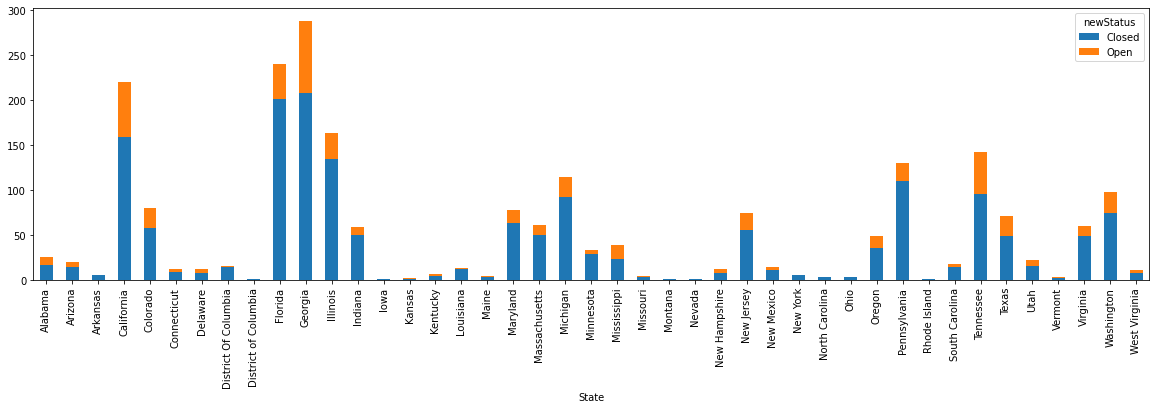

In [14]:
Status_complaints.plot(kind="bar", figsize=(20,5), stacked=True)

In [15]:
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
complaints_resolved = data.groupby(["Customer Complaint","Received Via"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)
complaints_resolved

,Customer Complaint,Received Via,Count
0,Comcast,Customer Care Call,42
1,Comcast,Internet,41
2,Comcast Internet,Internet,10
3,Comcast Data Cap,Customer Care Call,10
4,comcast,Customer Care Call,9
...,...,...,...
1910,Keep getting charged rental fees for modem I a...,Customer Care Call,1
1911,LIED TO!!! Now I'm suffering?!?! And at a loss!!!,Internet,1
1912,Lack of HBO Go Availability on Sony Devices wi...,Internet,1
1913,Lack of ISP choice,Internet,1


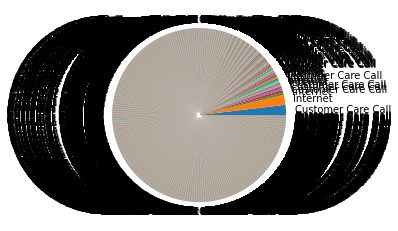

In [ ]:
plt.pie(complaints_resolved['Count'], labels=complaints_resolved['Received Via']);
plt.show()

In [ ]:
data.groupby(["Customer Complaint","Received Via"]).size().plot(kind="bar", figsize=(20,5), stacked=True)